<a href="https://colab.research.google.com/github/fereol023/Comments-generator/blob/main/Projet_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implémentez une régression classiques, ridge et lasso sur les données afin de prédire le prix d'un logement et donnez le meilleur modèle

Importation des librairies

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Chargement des données


In [23]:
from google.colab import drive
drive.mount('/content/drive')
#importer  la librairie Pandas
import pandas as pd
data= pd.read_csv("/content/drive/MyDrive/Data/data_house.csv", sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Les données

In [24]:
data.columns
print(data.shape)
data = data.to_numpy()
# la matrice de la variable à prédire
Y = data[:,-1]
#print(Y)
# les variables explicatives
X = data[:, 0:30]
print(X)
# Normalisation des données
X_normalized = preprocessing.StandardScaler().fit_transform(X)
# subdivision des données éch.test = 30% de la base totale
x_train, x_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1259, 31)
[[ 8450  2003  2003 ...     0     2  2008]
 [ 9600  1976  1976 ...     0     5  2007]
 [11250  2001  2002 ...     0     9  2008]
 ...
 [14303  1994  1994 ...     0     8  2008]
 [ 4060  1922  1950 ...     0     7  2009]
 [ 9587  2005  2005 ...     0     7  2008]]
(378, 30)


Matrice de correlation

Modele de Regression simple


In [25]:
# implemetation de la regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#création d'une instance de la classe
import statsmodels.api as sm
regressor_OLS = sm.OLS(Y, X)
regressor_fit = regressor_OLS.fit()
print(regressor_fit.summary())
print(regressor_fit.aic)



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1363.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:07:16   Log-Likelihood:                         -14961.
No. Observations:                1259   AIC:                                  2.998e+04
Df Residuals:                    1231   BIC:                                  3.012e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Regression Linéaire

In [33]:
# entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
lmodellineaire = LinearRegression()
model_1 = lmodellineaire.fit(x_train, y_train)
y_pred1 = model_1.predict(x_test)
# Importer le module metric
# Calculer les scores des modèles (accuracy, recall et f1_score )
# Root mean square error
#lm_rmse=sqrt(mean_squared_error(y_pred1, y_test))


print("mse Linear Regression = ",mean_squared_error(y_test, y_pred1))

mse Linear Regression =  1664898994.9048362


Regression Ridge

C'est une forme de regression linéaire qui est implémenter lorsque l'on veut limiter l'instabilité des prédictions liée au fait que certaines variables explicatives du modèle soient trop correlées entre elles.

Pour trouver un coefficient de régulation adapté, on test un certains nombre de coef pour trouver celui qui est optimal 


1- Implémentation d'une regression classique

In [38]:
# modèle de régression 
ridge = Ridge(alpha=0)
ridge.fit(x_train,y_train)
w = ridge.coef_
print("norme L2",round(np.sum(ridge.coef_**2),4))

norme L2 3.8970061637988464e+37


In [56]:
from sklearn.linear_model import Ridge
# la séquence
#alphas = np.logspace(-7,-7, 200)
alphas = np.logspace(-5,3, 200)
clf = Ridge()
coefs = []
errors = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))
    




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.93092e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.60844e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.3602e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.15745e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

On trace le “profil des coefficients” 

Adaptez au besoin la séquence de paramètres.

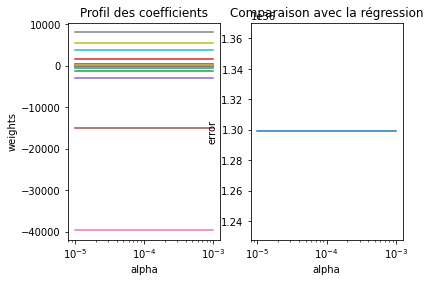

In [55]:
plt.figure()

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Profil des coefficients")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Comparaison avec la régression")
plt.axis("tight")

plt.show()

La figure affiche l'évolution de la valeur des différents poids associés aux paramètres

Comment évoluent la valeur de coefficients en fonction de λ?

On va utiliser la validation croisée pour trouver le λ optimal.